In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


Mean Squared Error: 0.9177532469714291


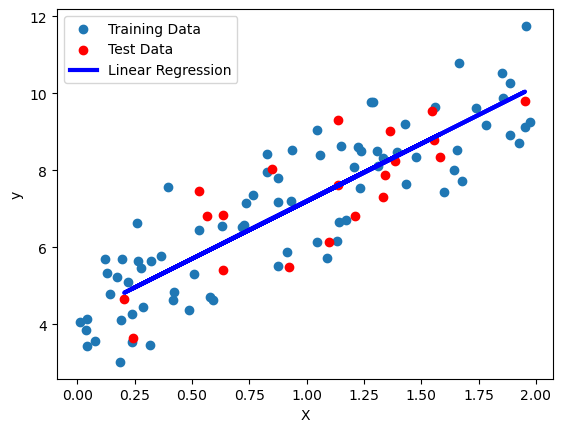

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


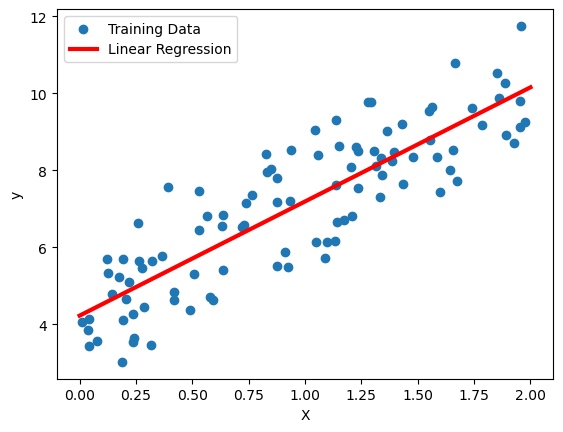

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  
y = 4 + 3 * X + np.random.randn(100, 1)  
model = LinearRegression()
model.fit(X, y)
X_new = np.array([[0], [2]])  
y_pred = model.predict(X_new)
plt.scatter(X, y, label='Training Data')
plt.plot(X_new, y_pred, color='red', linewidth=3, label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Mean Squared Error: 11.568840917858816


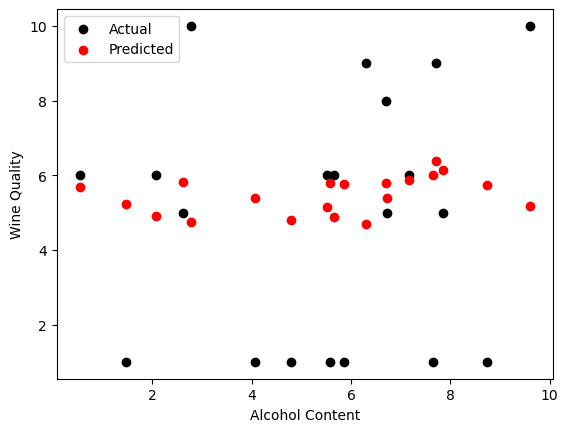

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data = {
    'alcohol': np.random.rand(100) * 10,
    'sugar': np.random.rand(100) * 5,
    'acidity': np.random.rand(100) * 3,
    'quality': np.random.randint(1, 11, size=100)
}

df = pd.DataFrame(data)
X = df[['alcohol', 'sugar', 'acidity']]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
plt.scatter(X_test['alcohol'], y_test, color='black', label='Actual')
plt.scatter(X_test['alcohol'], y_pred, color='red', label='Predicted')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.legend()
plt.show()


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



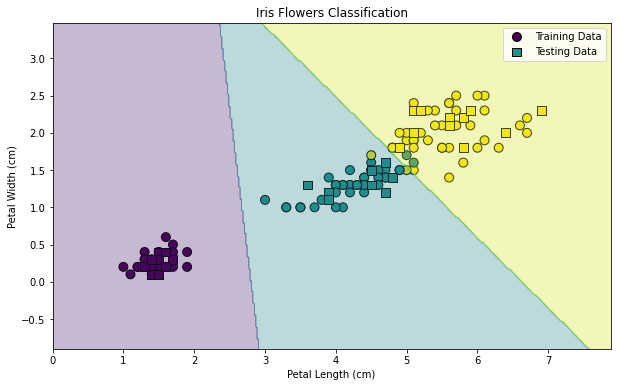

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

iris = datasets.load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

X = data[['petal length (cm)', 'petal width (cm)']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))

plt.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train, cmap='viridis', edgecolors='k', s=80, label='Training Data')

plt.scatter(X_test['petal length (cm)'], X_test['petal width (cm)'], c=y_test, cmap='viridis', marker='s', edgecolors='k', s=80, label='Testing Data')

h = .02
x_min, x_max = X['petal length (cm)'].min() - 1, X['petal length (cm)'].max() + 1
y_min, y_max = X['petal width (cm)'].min() - 1, X['petal width (cm)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Flowers Classification')
plt.legend()
plt.show()
